In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data=pd.read_csv("bigdatamarttrain.csv")
test_data=pd.read_csv("bigdatamarttest.csv")

In [3]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
train_data['Source']='Train'

In [5]:
train_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Train
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Train
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Train
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,Train
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,Train
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850,Train
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,Train
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,Train


In [6]:
train_data.shape

(8523, 13)

In [7]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [8]:
test_data['Source']='Test'

In [9]:
test_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Source
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,Test
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,Test
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,Test
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,Test
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,Test
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,Test
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,Test
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,Test
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,Test


In [10]:
test_data.shape

(5681, 12)

In [11]:
print('Train data:',train_data.shape)
print('Test data:',test_data.shape)

Train data: (8523, 13)
Test data: (5681, 12)


In [12]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [13]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Source                          0
dtype: int64

In [14]:
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
Source                          0
dtype: int64

In [15]:
df=pd.concat([train_data,test_data],ignore_index=True)

In [16]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,Train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,Test
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,Test
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,Test
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,Test


In [17]:
df.shape

(14204, 13)

In [18]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,Train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Train


In [19]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source
14199,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,Test
14200,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,Test
14201,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,Test
14202,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,Test
14203,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,Test


In [20]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Source                          0
dtype: int64

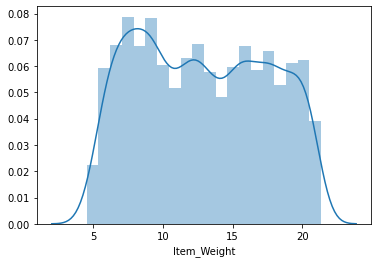

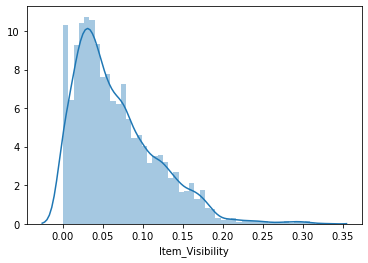

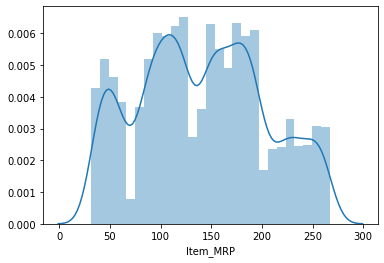

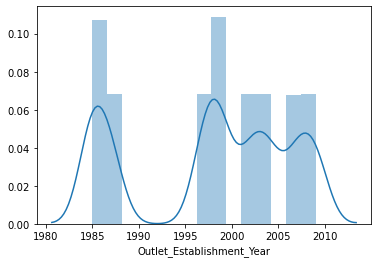

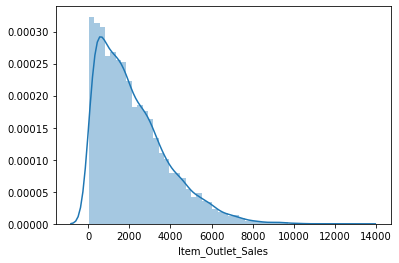

In [21]:
for g in train_data.describe().columns:
    sns.distplot(train_data[g].dropna())
    plt.show()

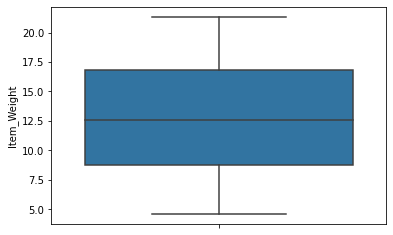

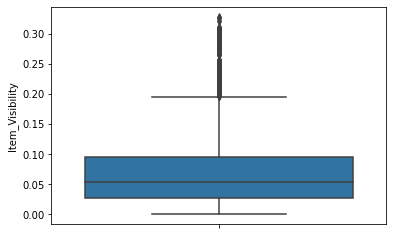

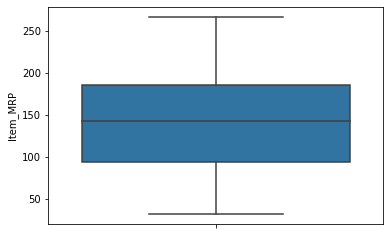

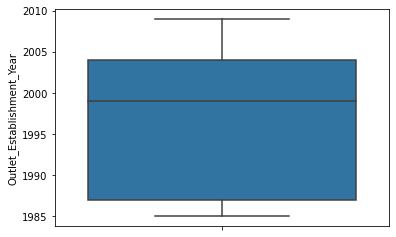

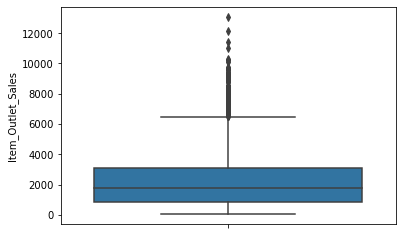

In [22]:
for i in train_data.describe().columns:
    sns.boxplot(y=train_data[i].dropna())
    plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

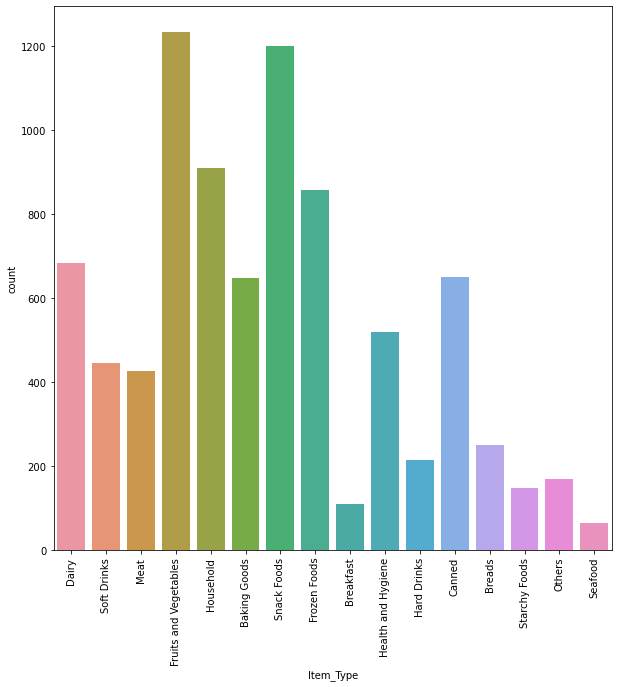

In [23]:
plt.figure(figsize=(10,10))
sns.countplot(train_data.Item_Type)
plt.xticks(rotation=90)

In [24]:
train_data.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

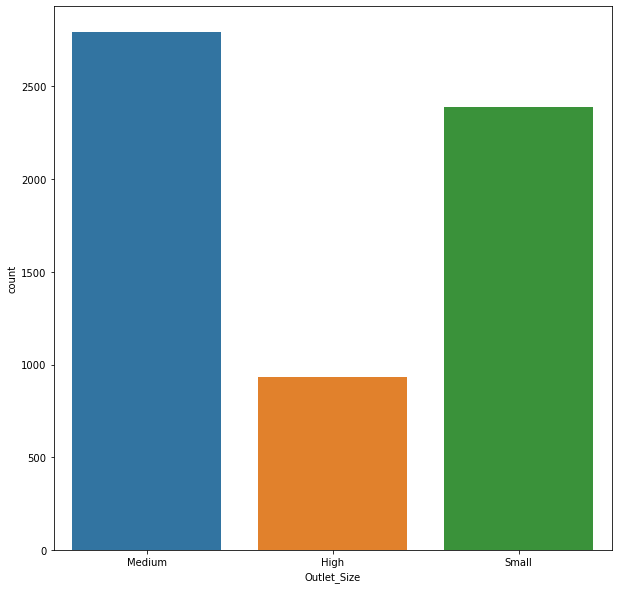

In [25]:
plt.figure(figsize=(10,10))
sns.countplot(train_data.Outlet_Size)

In [26]:
train_data.Outlet_Size.value_counts() 

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

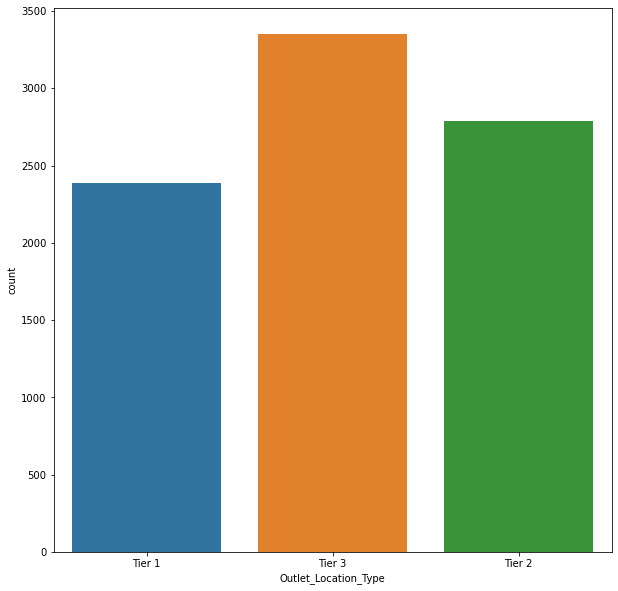

In [27]:
plt.figure(figsize=(10,10))
sns.countplot(train_data.Outlet_Location_Type)

In [28]:
train_data.Outlet_Location_Type.value_counts() 

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

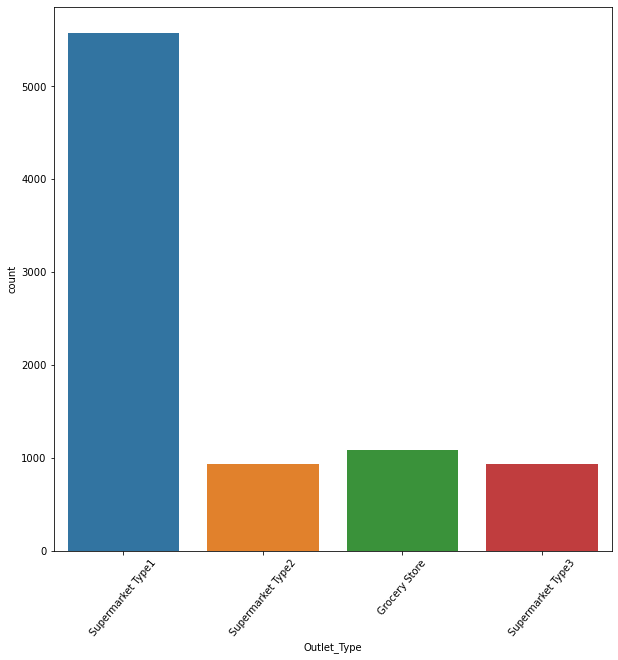

In [29]:
plt.figure(figsize=(10,10))
sns.countplot(train_data.Outlet_Type)
plt.xticks(rotation=50)

In [30]:
train_data.Outlet_Type.value_counts() 

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

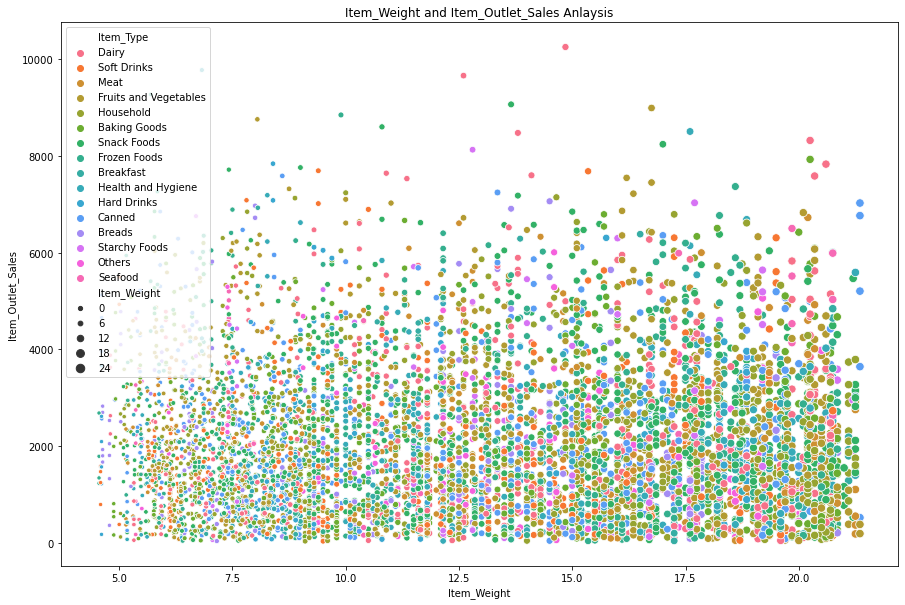

In [31]:
plt.figure(figsize=(15,10))
plt.xlabel('Item_Weight')
plt.ylabel('Item_Outlet_Sales')
plt.title("Item_Weight and Item_Outlet_Sales Anlaysis")
sns.scatterplot(x='Item_Weight',y='Item_Outlet_Sales',hue='Item_Type',size="Item_Weight",data=train_data)

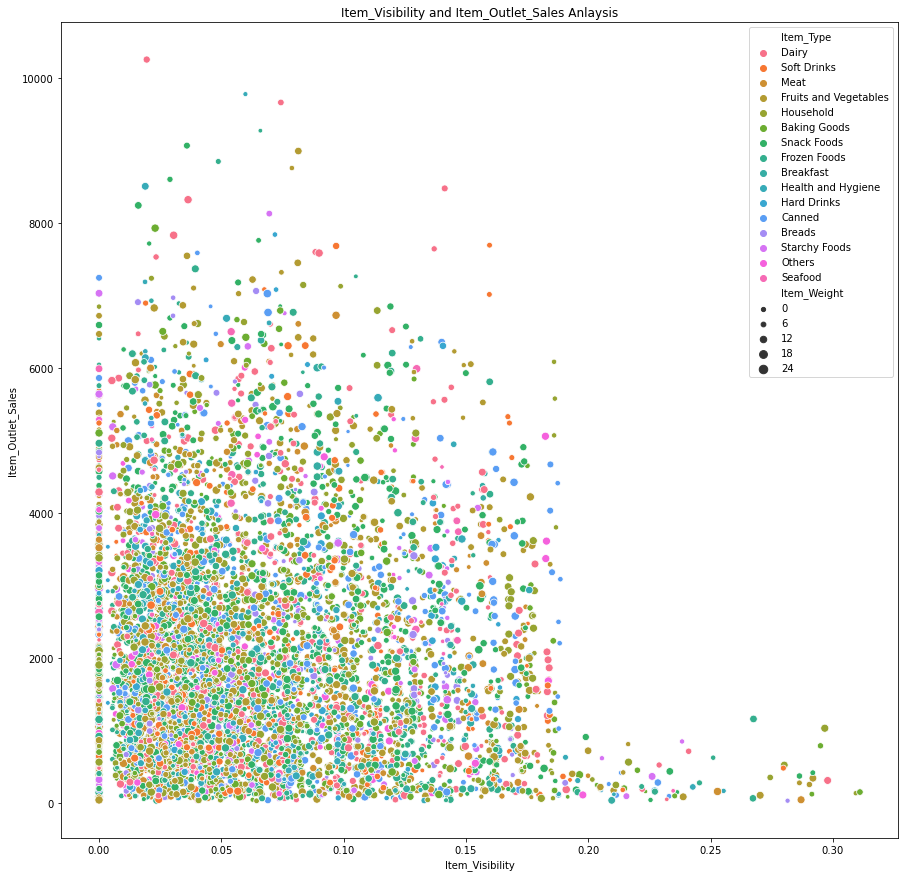

In [32]:
plt.figure(figsize=(15,15))
plt.xlabel('Item_Visibility')
plt.ylabel('Item_Outlet_Sales')
plt.title("Item_Visibility and Item_Outlet_Sales Anlaysis")
sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',hue='Item_Type',size="Item_Weight",data=train_data)

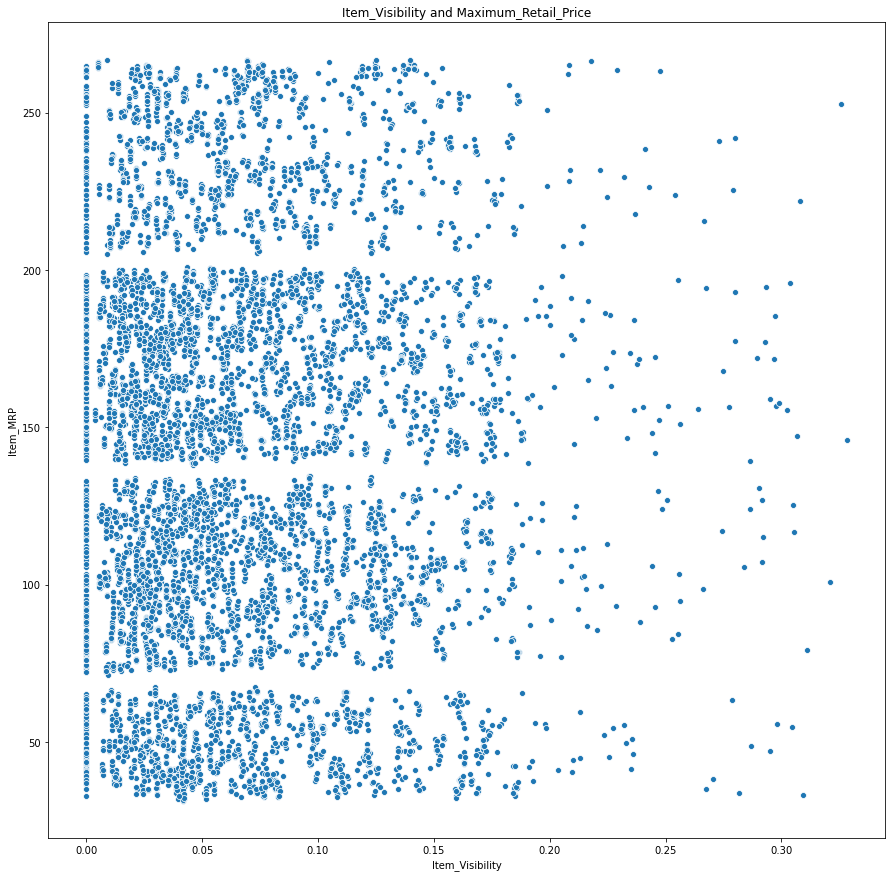

In [33]:
plt.figure(figsize=(15,15))
plt.xlabel('Item_Visibility')
plt.ylabel('Maximum_Retail_Price')
plt.title("Item_Visibility and Maximum_Retail_Price")
sns.scatterplot(x='Item_Visibility',y='Item_MRP',data=train_data)

In [34]:
train_data.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


<function matplotlib.pyplot.show(*args, **kw)>

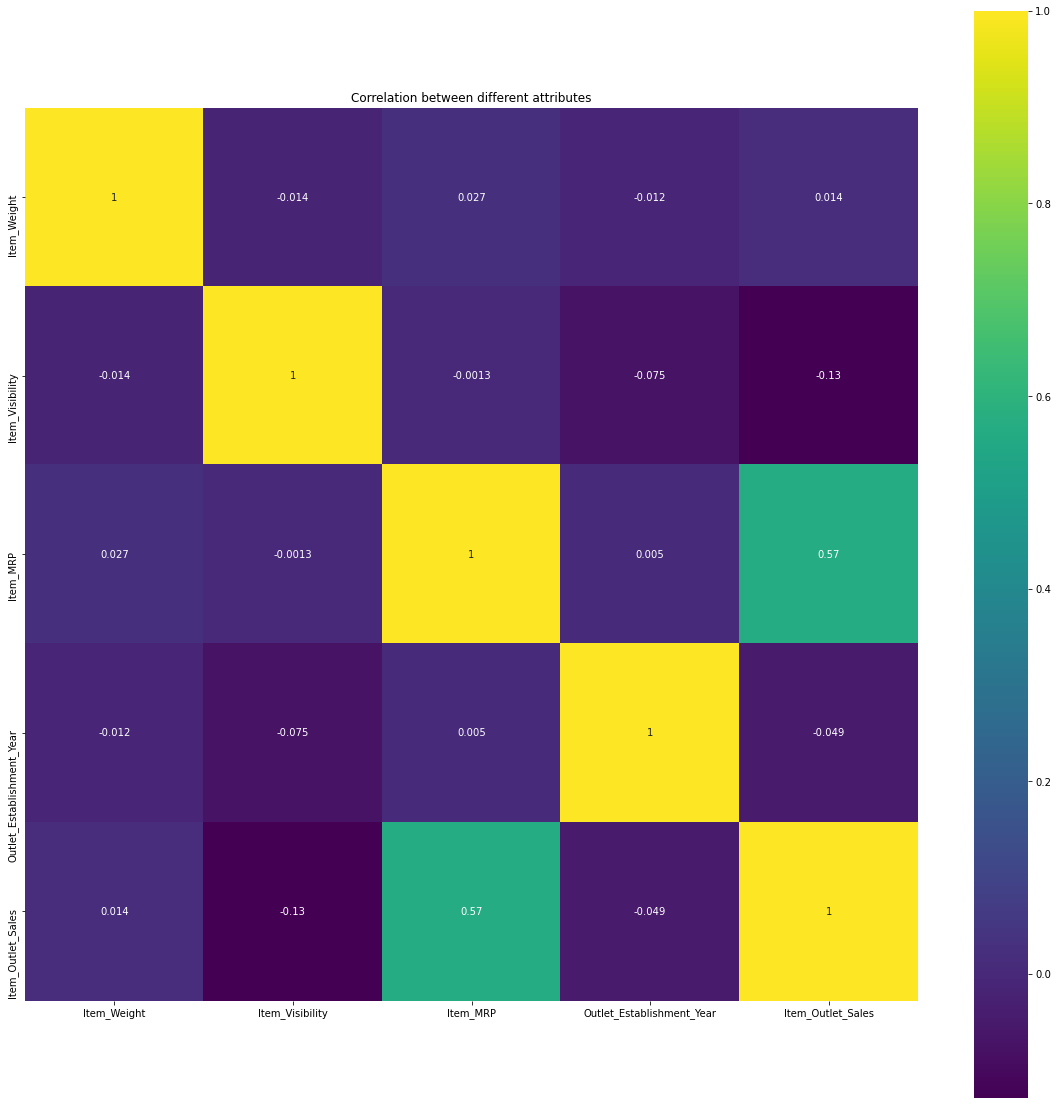

In [35]:
plt.figure(figsize=(20,20))
sns.heatmap(train_data.corr(),square=True,annot=True,cmap='viridis')
plt.title('Correlation between different attributes')
plt.show

In [36]:
df['Item_Weight'].mean()    # we will replace the Nan values with this mean value

12.792854228644991

In [37]:
train_data['Item_Weight'].fillna(train_data['Item_Weight'].mean(),inplace=True)

In [38]:
df['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [39]:
df['Outlet_Size'].fillna('Medium',inplace=True)

df.isnull().sum()

In [40]:
train_data.shape

(8523, 13)

In [41]:
test_data.shape

(5681, 12)

In [42]:
df.shape

(14204, 13)

In [43]:
 df[df['Item_Visibility']==0]['Item_Visibility'].count()

879

In [44]:
df['Item_Visibility'].fillna(df['Item_Visibility'].median(),inplace=True)

In [45]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)

 Outlet_Years

In [46]:
df['Outlet_Establishment_Year'].value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

In [47]:
df['Outlet_Years']=2009-df['Outlet_Establishment_Year']
df['Outlet_Years'].describe()

count    14204.000000
mean        11.169319
std          8.371664
min          0.000000
25%          5.000000
50%         10.000000
75%         22.000000
max         24.000000
Name: Outlet_Years, dtype: float64

Item type

In [48]:
df['Item_Type'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

The item types are either Food,Drinks or Non_Consumables.

In [49]:
df['Item_Identifier'].value_counts()

DRL01    10
DRK13    10
FDT59    10
NCC54    10
FDT04    10
         ..
FDI46     7
FDM50     7
FDL50     7
FDS22     7
FDM52     7
Name: Item_Identifier, Length: 1559, dtype: int64

In [50]:
#Changing only the first 2 character (i.e the category ID)
df['New_Item_type'] = df['Item_Identifier'].apply (lambda x: x[0:2])

In [51]:
# removing skewness with log transform

In [52]:
df['Item_Outlet_Sales']=np.log1p(df['Item_Outlet_Sales'])

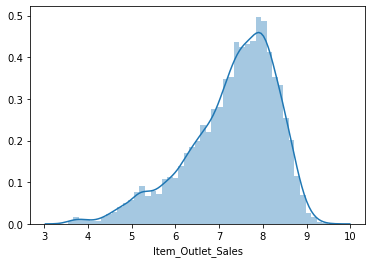

In [53]:
sns.distplot(df['Item_Outlet_Sales'])

In [54]:
df['Item_Visibility']=np.log1p(df['Item_Visibility'])


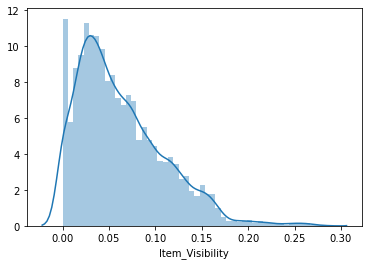

In [55]:
sns.distplot(df['Item_Visibility'])

In [56]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years
Item_Weight,1.000000,-0.013790,0.033002,0.000462,0.008476,-0.000462
Item_Visibility,-0.013790,1.000000,-0.005635,-0.081398,-0.188500,0.081398
Item_MRP,0.033002,-0.005635,1.000000,0.000141,0.509886,-0.000141
Outlet_Establishment_Year,0.000462,-0.081398,0.000141,1.000000,0.077032,-1.000000
Item_Outlet_Sales,0.008476,-0.188500,0.509886,0.077032,1.000000,-0.077032
Outlet_Years,-0.000462,0.081398,-0.000141,-1.000000,-0.077032,1.000000


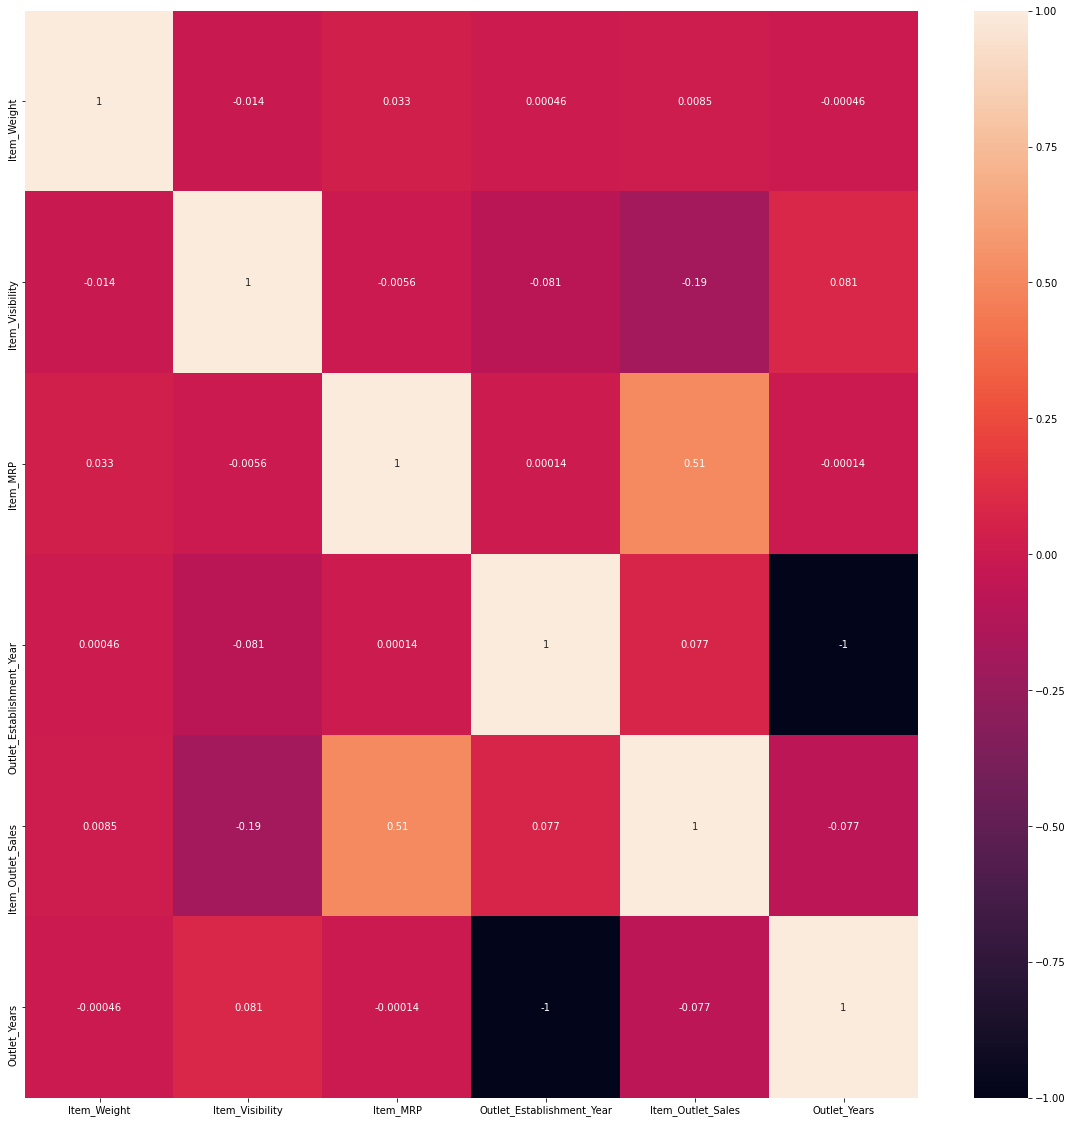

In [57]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

In [58]:
#Label Encoding

In [59]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

In [60]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source,Outlet_Years,New_Item_type
0,FDA15,9.30,Low Fat,0.015920,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.225808,Train,10,FD
1,DRC01,5.92,Regular,0.019095,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.096776,Train,0,DR
2,FDN15,17.50,Low Fat,0.016621,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,7.648868,Train,10,FD
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,6.597664,Train,11,FD
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,6.903451,Train,22,NC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013406,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,Test,12,FD
14200,FDD47,7.60,Regular,0.133648,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,Test,0,FD
14201,NCO17,10.00,Low Fat,0.070951,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1,NaN,Test,7,NC
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1,NaN,Test,2,FD


In [61]:
list=['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Type','Outlet_Location_Type','New_Item_type']
for i in list:
    df[i]=label.fit_transform(df[i])


In [62]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source,Outlet_Years,New_Item_type
0,FDA15,9.30,1,0.015920,4,249.8092,9,1999,1,0,1,8.225808,Train,10,1
1,DRC01,5.92,2,0.019095,14,48.2692,3,2009,1,2,2,6.096776,Train,0,0
2,FDN15,17.50,1,0.016621,10,141.6180,9,1999,1,0,1,7.648868,Train,10,1
3,FDX07,19.20,2,0.000000,6,182.0950,0,1998,1,2,0,6.597664,Train,11,1
4,NCD19,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,6.903451,Train,22,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,2,0.013406,13,141.3154,8,1997,2,0,1,NaN,Test,12,1
14200,FDD47,7.60,2,0.133648,15,169.1448,3,2009,1,2,2,NaN,Test,0,1
14201,NCO17,10.00,1,0.070951,8,118.7440,7,2002,1,1,1,NaN,Test,7,2
14202,FDJ26,15.30,2,0.000000,3,214.6218,2,2007,1,1,1,NaN,Test,2,1


1.We have a column New_Item_type for distinguishing the items. So we can drop it.
2.We can replace Outlet_Establishment_Year as we have created Outlet_Years for the same.

In [63]:
df.drop(['Item_Identifier','Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

In [64]:
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source,Outlet_Years,New_Item_type
0,9.30,1,0.015920,249.8092,9,1,0,1,8.225808,Train,10,1
1,5.92,2,0.019095,48.2692,3,1,2,2,6.096776,Train,0,0
2,17.50,1,0.016621,141.6180,9,1,0,1,7.648868,Train,10,1
3,19.20,2,0.000000,182.0950,0,1,2,0,6.597664,Train,11,1
4,8.93,1,0.000000,53.8614,1,0,2,1,6.903451,Train,22,2
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,10.50,2,0.013406,141.3154,8,2,0,1,NaN,Test,12,1
14200,7.60,2,0.133648,169.1448,3,1,2,2,NaN,Test,0,1
14201,10.00,1,0.070951,118.7440,7,1,1,1,NaN,Test,7,2
14202,15.30,2,0.000000,214.6218,2,1,1,1,NaN,Test,2,1


In [65]:
train_data=df.loc[df['Source']=='Train']
test_data=df.loc[df['Source']=='Test']

In [66]:
train_data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source,Outlet_Years,New_Item_type
0,9.300,1,0.015920,249.8092,9,1,0,1,8.225808,Train,10,1
1,5.920,2,0.019095,48.2692,3,1,2,2,6.096776,Train,0,0
2,17.500,1,0.016621,141.6180,9,1,0,1,7.648868,Train,10,1
3,19.200,2,0.000000,182.0950,0,1,2,0,6.597664,Train,11,1
4,8.930,1,0.000000,53.8614,1,0,2,1,6.903451,Train,22,2
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,1,0.055230,214.5218,1,0,2,1,7.929984,Train,22,1
8519,8.380,2,0.045912,108.1570,7,1,1,1,6.310436,Train,7,1
8520,10.600,1,0.034581,85.1224,6,2,1,1,7.085159,Train,5,2
8521,7.210,2,0.135597,103.1332,3,1,2,2,7.521100,Train,0,1


In [67]:
test_data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source,Outlet_Years,New_Item_type
8523,20.750000,1,0.007536,107.8622,9,1,0,1,NaN,Test,10,1
8524,8.300000,4,0.037708,87.3198,2,1,1,1,NaN,Test,2,1
8525,14.600000,1,0.094924,241.7538,0,1,2,0,NaN,Test,11,2
8526,7.315000,1,0.015271,155.0340,2,1,1,1,NaN,Test,2,1
8527,12.792854,2,0.112077,234.2300,5,1,2,3,NaN,Test,24,1
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,10.500000,2,0.013406,141.3154,8,2,0,1,NaN,Test,12,1
14200,7.600000,2,0.133648,169.1448,3,1,2,2,NaN,Test,0,1
14201,10.000000,1,0.070951,118.7440,7,1,1,1,NaN,Test,7,2
14202,15.300000,2,0.000000,214.6218,2,1,1,1,NaN,Test,2,1


In [68]:
x_train=train_data.drop(['Item_Outlet_Sales','Source'],axis=1)
y_train=train_data['Item_Outlet_Sales']
x_test=test_data

In [69]:
x_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Years,New_Item_type
0,9.300,1,0.015920,249.8092,9,1,0,1,10,1
1,5.920,2,0.019095,48.2692,3,1,2,2,0,0
2,17.500,1,0.016621,141.6180,9,1,0,1,10,1
3,19.200,2,0.000000,182.0950,0,1,2,0,11,1
4,8.930,1,0.000000,53.8614,1,0,2,1,22,2
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,1,0.055230,214.5218,1,0,2,1,22,1
8519,8.380,2,0.045912,108.1570,7,1,1,1,7,1
8520,10.600,1,0.034581,85.1224,6,2,1,1,5,2
8521,7.210,2,0.135597,103.1332,3,1,2,2,0,1


In [70]:
y_train

0       8.225808
1       6.096776
2       7.648868
3       6.597664
4       6.903451
          ...   
8518    7.929984
8519    6.310436
8520    7.085159
8521    7.521100
8522    6.642056
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [71]:
x_test=test_data.drop(['Item_Outlet_Sales','Source'],axis=1)

In [72]:
x_test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Years,New_Item_type
8523,20.750000,1,0.007536,107.8622,9,1,0,1,10,1
8524,8.300000,4,0.037708,87.3198,2,1,1,1,2,1
8525,14.600000,1,0.094924,241.7538,0,1,2,0,11,2
8526,7.315000,1,0.015271,155.0340,2,1,1,1,2,1
8527,12.792854,2,0.112077,234.2300,5,1,2,3,24,1
...,...,...,...,...,...,...,...,...,...,...
14199,10.500000,2,0.013406,141.3154,8,2,0,1,12,1
14200,7.600000,2,0.133648,169.1448,3,1,2,2,0,1
14201,10.000000,1,0.070951,118.7440,7,1,1,1,7,2
14202,15.300000,2,0.000000,214.6218,2,1,1,1,2,1


In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
list=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),RandomForestRegressor(),AdaBoostRegressor()]

for h in list:
    h.fit(x_train,y_train)
    pred=h.predict(x_test)
    print('for the algorithm: ',h,'Score: ',h.score(x_train,y_train))
        
    

for the algorithm:  LinearRegression() Score:  0.5938444887480887
for the algorithm:  DecisionTreeRegressor() Score:  1.0
for the algorithm:  KNeighborsRegressor() Score:  0.7872726838221173
for the algorithm:  RandomForestRegressor() Score:  0.9582208596188029
for the algorithm:  AdaBoostRegressor() Score:  0.6821534928344363


In [74]:
dtr=DecisionTreeRegressor()

In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
param={
    'criterion':['mse','mae'],
    'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10]
}
cv = GridSearchCV(dtr, param_grid=param)
cv.fit(x_train, y_train)
print(cv.best_score_)
print(cv.best_estimator_)
print(cv.best_params_)

0.6679239744218088
DecisionTreeRegressor(min_samples_leaf=10)
{'criterion': 'mse', 'min_samples_leaf': 10}


In [76]:
#WORKING ON THE BEST MODEL
dtr=DecisionTreeRegressor(criterion='mse',min_samples_leaf=10)
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)
print("ACCURACY:",dtr.score(x_train,y_train))

ACCURACY: 0.8065354549009471


In [77]:
#Saving the best model
import joblib
joblib.dump(dtr,'Bigdatamart_dtr.obj')

['Bigdatamart_dtr.obj']